In [2]:
import math
import scipy
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import GEOparse

In [3]:
# load soft data
gse = GEOparse.get_GEO(filepath="GSE28490_series_matrix\GSE28490_family.soft.gz")

# raw data
col_value = 'VALUE'
col_type = 'source_name_ch1'
df_pivoted_samples = gse.pivot_samples(col_value)[gse.phenotype_data.index].rename(columns=gse.phenotype_data[col_type])

df_raw = df_pivoted_samples
df_raw = 2 ** df_raw

24-Dec-2020 16:01:26 INFO GEOparse - Parsing GSE28490_series_matrix\GSE28490_family.soft.gz: 
24-Dec-2020 16:01:26 DEBUG GEOparse - DATABASE: GeoMiame
24-Dec-2020 16:01:26 DEBUG GEOparse - SERIES: GSE28490
24-Dec-2020 16:01:26 DEBUG GEOparse - PLATFORM: GPL570
C:\Users\Minta\Anaconda3\lib\site-packages\GEOparse\GEOparse.py:110: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705287
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705288
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705289
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705290
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705291
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705292
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705293
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705294
24-Dec-2020 16:01:28 DEBUG GEOparse - SAMPLE: GSM705295
24-Dec-2020 

In [4]:
df_raw

name,CD14+ monocytes from healthy donor pool 1,CD14+ monocytes from healthy donor pool 13,CD14+ monocytes from healthy donor pool 15,CD14+ monocytes from healthy donor pool 16,CD14+ monocytes from healthy donor pool 17,CD14+ monocytes from healthy donor pool 18,CD14+ monocytes from healthy donor pool 2,CD14+ monocytes from healthy donor pool 6,CD14+ monocytes from healthy donor pool 7,CD14+ monocytes from healthy donor pool 8,CD19+ B cells from healthy donor pool 11,CD19+ B cells from healthy donor pool 6,CD19+ B cells from healthy donor pool 7,CD19+ B cells from healthy donor pool 8,CD19+ B cells from healthy donor pool 9,CD4+ T cells from healthy donor pool 2,CD4+ T cells from healthy donor pool 3,CD4+ T cells from healthy donor pool 4,CD4+ T cells from healthy donor pool 7,CD4+ T cells from healthy donor pool 8,NK cells from healthy donor pool 10,NK cells from healthy donor pool 12,NK cells from healthy donor pool 6,NK cells from healthy donor pool 7,NK cells from healthy donor pool 9,CD8+ T cells from healthy donor pool 10,CD8+ T cells from healthy donor pool 11,CD8+ T cells from healthy donor pool 12,CD8+ T cells from healthy donor pool 3,CD8+ T cells from healthy donor pool 4,Eosinophils from healthy donor pool 3,Eosinophils from healthy donor pool 4,Eosinophils from healthy donor pool 7,Eosinophils from healthy donor pool 8,mDCs from healthy donor pool 14,mDCs from healthy donor pool 15,mDCs from healthy donor pool 16,mDCs from healthy donor pool 17,mDCs from healthy donor pool 18,Neutrophils from healthy donor pool 3,Neutrophils from healthy donor pool 4,Neutrophils from healthy donor pool 7,pDCs from healthy donor pool 13,pDCs from healthy donor pool 14,pDCs from healthy donor pool 16,pDCs from healthy donor pool 17,pDCs from healthy donor pool 18
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,33.058515,31.744395,40.037223,34.331239,44.414228,43.029077,38.178275,38.668047,42.286346,40.406066,104.645757,131.964860,129.200693,123.726438,98.445271,59.020736,60.965029,58.884254,55.663897,54.382479,40.843370,42.568077,46.327920,38.302589,33.789193,57.987900,60.389675,63.404793,55.926107,58.413098,59.896093,54.648500,59.703765,52.067456,51.783120,55.407140,41.964573,43.444149,46.791352,56.490251,54.723932,60.980243,62.955477,92.587145,70.054703,76.662014,76.819997
117_at,178.194624,146.100773,142.282064,138.447002,145.870061,193.964659,147.681981,146.348079,148.816429,142.071169,30.717736,25.820410,32.941401,27.409612,50.945048,28.970647,64.704314,24.734109,41.738302,25.118354,56.990518,53.083809,35.100751,63.568053,61.862361,16.711971,16.120449,14.831679,15.762779,17.579718,118.904541,157.694660,141.199386,177.354239,99.054458,87.685112,30.275104,74.023939,69.475866,687.711662,576.921013,719.210364,14.053718,17.385468,18.230851,11.165841,14.734845
121_at,83.603996,81.911267,63.057672,84.793396,71.720319,78.206684,71.778506,73.987005,80.412618,68.806836,57.674033,84.141172,82.642959,69.493686,35.245569,64.803058,44.156074,81.395098,50.922806,68.115914,34.779614,59.341521,99.198060,57.002765,44.458581,36.219883,42.112891,49.414756,98.455507,82.413570,113.431695,133.511481,111.541750,109.343223,80.540359,75.811773,70.336907,86.294099,79.610676,107.704148,120.145600,130.775638,78.320605,82.386726,81.550397,72.799165,82.462140
1294_at,205.470861,154.656108,168.961414,157.258043,155.295262,155.778249,178.783527,135.728512,142.038675,140.369920,241.207340,158.167568,238.013567,238.309062,292.078023,227.723600,199.163574,159.120952,211.600613,197.110388,138.334769,178.512340,130.649700,221.876029,211.180088,188.643686,188.390186,219.474573,131.331575,180.366800,148.043773,178.714143,185.645946,183.321222,117.226912,109.075252,86.074859,110.994932,104.879580,90.182150,85.557949,61.536053,96.199001,95.530532,88.901139,91.888346,87.811623
1316_at,20.454410,17.048466,25.866089,22.528510,19.685753,25.564147,19.992126,21.186597,23.527563,24.527189,26.602686,25.947435,22.384373,22.783066,37.738103,35.311103,60.992925,35.

In [5]:
# group subtype means
col_subtypes = ['T cells', 'monocytes', 'B cells', 'NK cells', 'Neutrophils']
map_subtypes = {}

for col in col_subtypes:
    map_subtypes[col] = df_pivoted_samples.filter(regex=col).columns.tolist()
    print(f"{col} : {len(map_subtypes[col])}")
    print(map_subtypes[col])

T cells : 10
['CD4+ T cells from healthy donor pool 2', 'CD4+ T cells from healthy donor pool 3', 'CD4+ T cells from healthy donor pool 4', 'CD4+ T cells from healthy donor pool 7', 'CD4+ T cells from healthy donor pool 8', 'CD8+ T cells from healthy donor pool 10', 'CD8+ T cells from healthy donor pool 11', 'CD8+ T cells from healthy donor pool 12', 'CD8+ T cells from healthy donor pool 3', 'CD8+ T cells from healthy donor pool 4']
monocytes : 10
['CD14+ monocytes from healthy donor pool 1', 'CD14+ monocytes from healthy donor pool 13', 'CD14+ monocytes from healthy donor pool 15', 'CD14+ monocytes from healthy donor pool 16', 'CD14+ monocytes from healthy donor pool 17', 'CD14+ monocytes from healthy donor pool 18', 'CD14+ monocytes from healthy donor pool 2', 'CD14+ monocytes from healthy donor pool 6', 'CD14+ monocytes from healthy donor pool 7', 'CD14+ monocytes from healthy donor pool 8']
B cells : 5
['CD19+ B cells from healthy donor pool 11', 'CD19+ B cells from healthy donor p

In [6]:
df_mean = pd.DataFrame(index=df_raw.index)

for col in col_subtypes:
    df_mean[col] = df_raw[map_subtypes[col]].mean(axis=1)

df_mean

,T cells,monocytes,B cells,NK cells,Neutrophils
ID_REF,,,,,
1007_s_at,58.503797,38.615341,117.596604,40.366230,57.398142
117_at,26.627232,152.977684,33.566841,54.121099,661.281013
121_at,61.800956,75.827830,65.839484,58.956108,119.541795
1294_at,190.292595,159.434057,233.555112,176.110585,79.092051
1316_at,55.405417,22.038085,27.091132,71.017404,18.069836
...,...,...,...,...,...
AFFX-HUMGAPDH/M33197_5_at,1574.047661,3330.397572,723.421118,1491.241038,1174.649345
AFFX-HUMGAPDH/M33197_M_at,1666.715310,3737.771172,853.983168,1630.479310,1169.164246
AFFX-HUMISGF3A/M97935_3_at,249.941372,256.024687,134.227850,209.733138,231.810784


In [7]:
df_mean['norm'] = np.sqrt((df_mean**2).sum(axis=1))

In [8]:
df_cos = pd.DataFrame(index=df_mean.index)
for col in col_subtypes:
    df_cos[col] = df_mean[col] / df_mean['norm']
df_cos

,T cells,monocytes,B cells,NK cells,Neutrophils
ID_REF,,,,,
1007_s_at,0.380290,0.251010,0.764408,0.262391,0.373103
117_at,0.039029,0.224227,0.049200,0.079328,0.969271
121_at,0.347272,0.426092,0.369966,0.331287,0.671730
1294_at,0.485780,0.407004,0.596221,0.449576,0.201907
1316_at,0.563739,0.224233,0.275647,0.722588,0.183857
...,...,...,...,...,...
AFFX-HUMGAPDH/M33197_5_at,0.374179,0.791694,0.171970,0.354494,0.279235
AFFX-HUMGAPDH/M33197_M_at,0.359423,0.806042,0.184159,0.351609,0.252128
AFFX-HUMISGF3A/M97935_3_at,0.506240,0.518561,0.271870,0.424801,0.469518


In [9]:
df_cos['MAXCOS'] = df_cos.max(axis=1)

In [282]:
data = df_cos['MAXCOS'].values.copy()

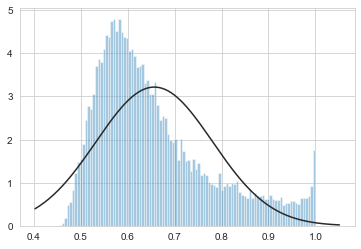

In [283]:
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

sns.distplot(data, bins=100, kde=False, fit=stats.norm);

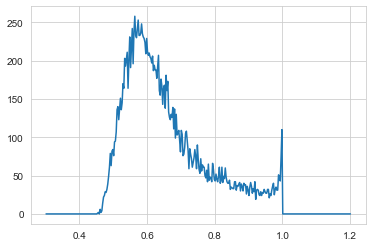

In [284]:
bins = np.arange(0.300, 1.205, 0.0025)
cent = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

hist, _ = np.histogram(data, bins=bins)
plt.plot(cent, hist)

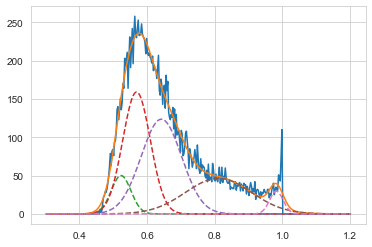

In [285]:
import numpy as np
from scipy.optimize import curve_fit

def norm(x):
    return np.exp(-x**2 / 2) / np.sqrt(2*np.pi)

def func(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = np.abs(params[i])
        u = params[i+1]
        s = np.abs(params[i+2]) + 0.02
        y = y + a / s * norm((x - u) / s)
    return y

def func_sep(x, *params):
    y = np.zeros_like(x)
    z = np.zeros((len(params) // 3, len(x)))
    for i in range(0, len(params), 3):
        a = np.abs(params[i])
        u = params[i+1]
        s = np.abs(params[i+2]) + 0.02
        z[i//3, :] = a / s * norm((x - u) / s)
        y = y + z[i//3, :]
    return y, z

guess = np.array([50, 0.50, 0.1, 
                  20, 0.60, 0.1, 
                  20, 0.70, 0.1])
guess = np.array([15, 0.53, 0.01, 
                  30, 0.58, 0.02, 
                  40, 0.65, 0.05, 
                  20, 0.82, 0.07, 
                   3, 0.98, 0.00])
guess = np.array([ 8, 0.53, 0.01, 
                  15, 0.58, 0.02, 
                  20, 0.65, 0.05, 
                  10, 0.82, 0.07, 
                   2, 0.98, 0.00])

x = cent
y = hist

popt, pcov = curve_fit(func, x, y, p0=guess, ftol=1e-6)
yfit, ysep = func_sep(x, *popt)
#yfit, ysep = func_sep(x, *guess)

plt.plot(x, y)
plt.plot(x, yfit)
plt.plot(x, ysep.T, '--')

In [286]:
from scipy.special import erf

# integral of norm function from +inf to x
def norm_int(x):
    return (1 - erf(x / np.sqrt(2))) / 2 if x >= 0 else (1 + erf(-x / np.sqrt(2))) / 2

# integral of multiple gaussian functions from +inf to x
def p_value(x, params):
    p = 0
    w = 0
    for i in range(0, len(params), 3):
        a = np.abs(params[i])
        u = params[i+1]
        s = np.abs(params[i+2]) + 0.02
        p += a * (norm_int((x - u) / s) - norm_int((1 - u) / s))
        w += a * (norm_int((0 - u) / s) - norm_int((1 - u) / s))
    return p / w

norm_int(+1.645)
#norm_int(-1.960)
p_value(0.900, popt)

0.05833198678445043

In [287]:
import random
random.seed(42)

# def remove_tp(data, params, alpha=0.05):
#     num_fp = int(len(data) * alpha)
#     idx_p = [i for i, x in enumerate(data) if p_value(x, params) <= alpha]
#     num_tp = len(idx_p) - num_fp
#     idx_tp = random.sample(idx_p, num_tp)
#     y = np.array([x for i, x in enumerate(data) if i not in set(idx_tp)])
#     return y, num_tp

def remove_tp(data, params, alpha=0.05):
    idx_p = [i for i, x in enumerate(data) if p_value(x, params) <= alpha]
    num_fp = int((len(data) - len(idx_p)) / (1 - alpha) * alpha)
    num_tp = len(idx_p) - num_fp
    idx_tp = random.sample(idx_p, num_tp)
    y = np.array([x for i, x in enumerate(data) if i not in set(idx_tp)])
    return y, num_tp

data_new, num_remove = remove_tp(data, popt, 0.05)

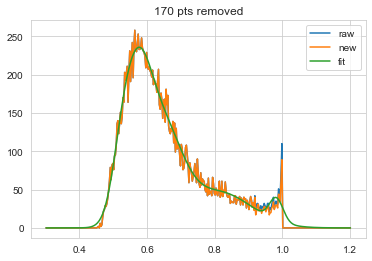

In [288]:
y_new, _ = np.histogram(data_new, bins=bins)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_new)
ax.plot(x, yfit)

ax.legend(['raw', 'new', 'fit'])
plt.title(f'{num_remove} pts removed')
#plt.xlim([0.90, 1.01])

plt.show()

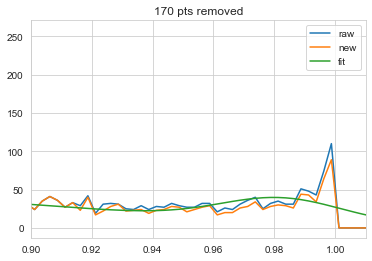

In [289]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_new)
ax.plot(x, yfit)

ax.legend(['raw', 'new', 'fit'])
plt.title(f'{num_remove} pts removed')
plt.xlim([0.90, 1.01])

plt.show()

1. fit the histogram with 5 gaussians
2. for each cos value, calculate its p-value
3. label all the cos values with a p-value <= alpha (0.05) as positive
4. num_negative = num_total - num_positive
5. num_false_positive = num_negative / (1 - alpha) * alpha
6. num_true_positive = num_positive - num_false_positive
7. remove num_true_positive points from the positive points

In [290]:
# p-value
cos_threshold = 0.9148
p_value(cos_threshold, popt)

0.05001244529619192

In [291]:
# false positive after pts removal
len([x for x in data_new if x >= cos_threshold]) / len(data_new)

0.049957914541763626

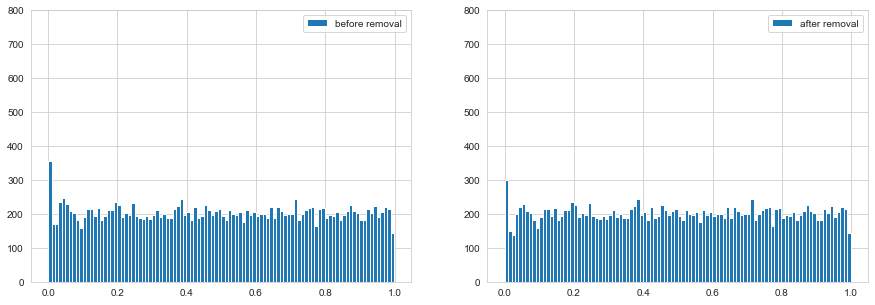

In [293]:
fig = plt.figure(figsize=(15, 5))

# before removal
ax = fig.add_subplot(121)
_ = ax.hist([p_value(x, popt) for x in data], bins=100)
ax.set_ylim([0, 400])
ax.legend(['before removal'])

# after removal
ax = fig.add_subplot(122)
_ = ax.hist([p_value(x, popt) for x in data_new], bins=100)
ax.set_ylim([0, 400])
ax.legend(['after removal'])

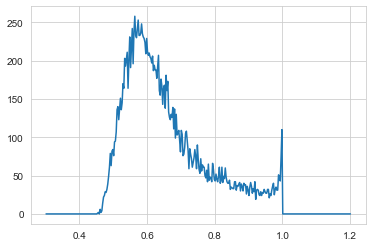

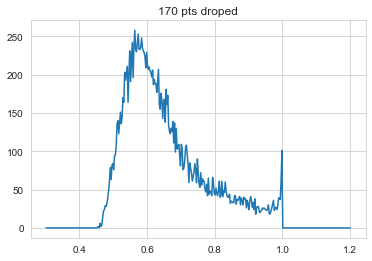

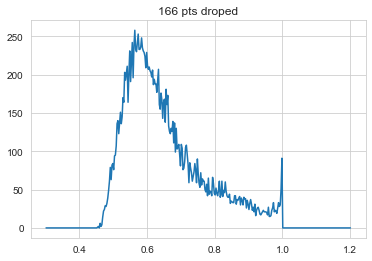

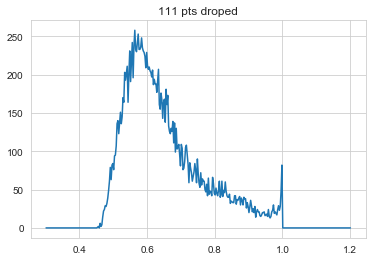

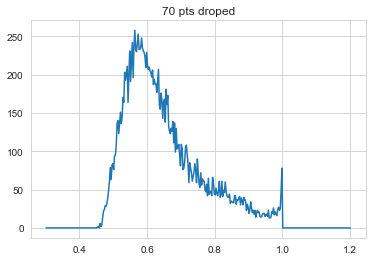

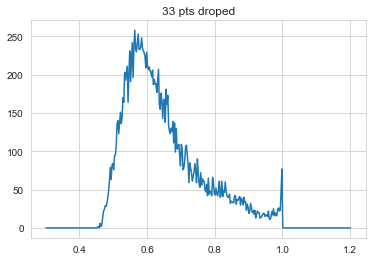

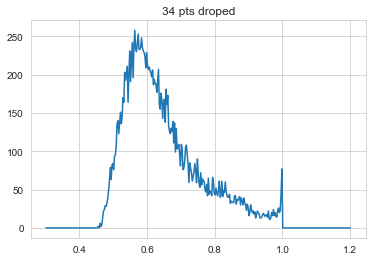

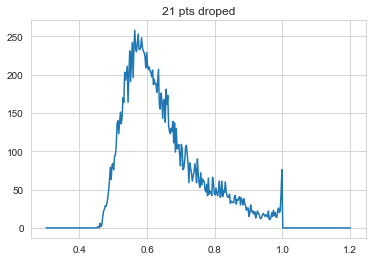

In [294]:
def run_one_iteration(data, bins, guess, alpha=0.05):
    x = np.array([(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)])
    y, _ = np.histogram(data, bins=bins)
    
    popt, pcov = curve_fit(func, x, y, p0=guess, ftol=1e-6, maxfev=100000)
    yfit = func(x, *popt)
    
    data_new, num_tp = remove_tp(data, popt, alpha)
    
    return data_new, num_tp, popt

alpha = 0.05
max_iter = 100
threshold_tp = 1

data = df_cos['MAXCOS'].values.copy()

x = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
y, _ = np.histogram(data, bins=bins)

fig, ax = plt.subplots()
ax.plot(x, y)

i = 0
fig, ax = plt.subplots()
while True:
    data_new, num_tp, popt = run_one_iteration(data, bins, guess, alpha)
    data = data_new
    guess = popt
    
    i += 1
    if num_tp < threshold_tp or i > max_iter:
        break
    
    y, _ = np.histogram(data, bins=bins)
    
    plt.plot(x, y)
    plt.title(f'{num_tp} pts droped')
    plt.show()


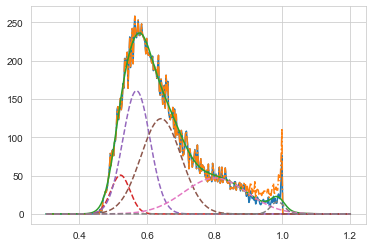

In [295]:
data = df_cos['MAXCOS'].values.copy()
yraw, _ = np.histogram(data, bins=bins)

popt, pcov = curve_fit(func, x, y, p0=guess, ftol=1e-6, maxfev=100000)
yfit, ysep = func_sep(x, *popt)

fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, yraw, '-.')
ax.plot(x, yfit)
ax.plot(x, ysep.T, '--')

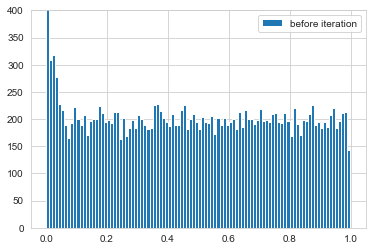

In [297]:
plt.hist([p_value(x, popt) for x in data], bins=100)
plt.ylim([0, 400])
plt.legend(['before iteration'])